# Binary black hole detections

Matriculation: 2663452m

## Aims
The aims of this experiment are to procees the gravitational wave data from the first and second runs of the LIGO/Virgo gravitational wave detectors and to discover properties of the binary black hole systems that prodiced the signals.


Gravitational waves were first predicted by Einstien in his 1915 paper on General Relativity but in 2015 the first gravitational wave was detected by the LIGO research group.

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import scipy.optimize as opt
import scipy.constants as const
import os
import lal as lal
from scipy.signal import spectrogram
import gw_detections_functions as gw
import pandas as pd


title_size = 16
axis_size = 12
plt.rcParams["font.family"] = "Times New Roman"


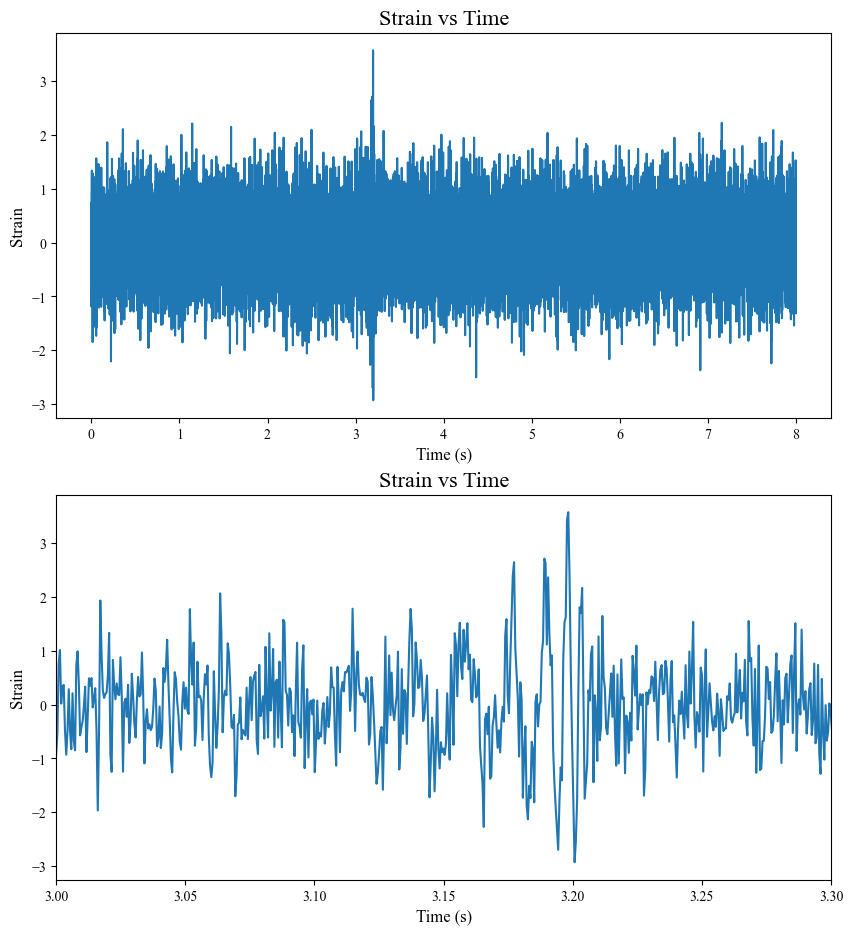

In [164]:
data = np.loadtxt('strain_data/GW150914_strain.txt')
time = data[:,0]
strain = data[:,1]

plt.figure(figsize = (10,11))
plt.subplot(2,1,1)
plt.plot(time, strain)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)

plt.subplot(2,1,2)
plt.plot(time, strain)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.xlim(3,3.3)
plt.show()

The siganl shows a peak in the strain likely as the black holes collide releasing a lot of energy in a short amount of time.

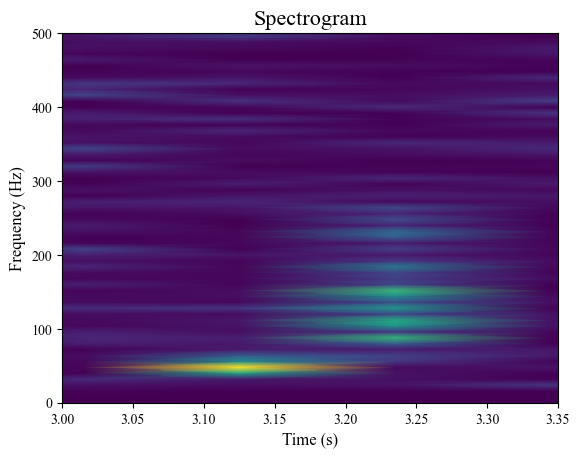

In [165]:
spec_f, spec_t, spec = sp.signal.spectrogram(strain, 2048)
plt.pcolormesh(spec_t, spec_f, spec, shading='gouraud')
plt.ylabel('Frequency (Hz)', fontsize=axis_size)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.xlim(3,3.35)
plt.ylim(0,500)
plt.title('Spectrogram', fontsize=title_size)
plt.show()


reasonable mass of a black hole in merger 7 - 37 solar masses

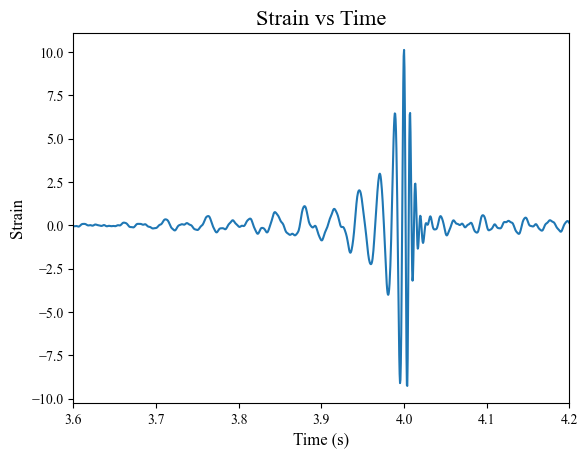

In [166]:
inv_psd = np.loadtxt('inv_psd/GW150914_inv_psd.txt',usecols=(1,))
t, template = gw.make_template(70,36,2048,8,inv_psd,400)

plt.figure()
plt.plot(t, template)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.xlim(3.6,4.2)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.show()


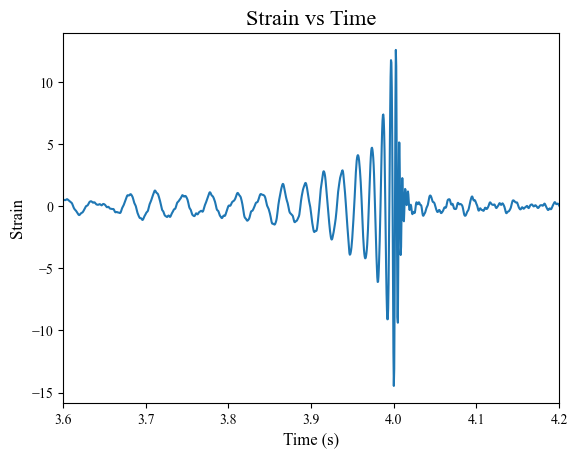

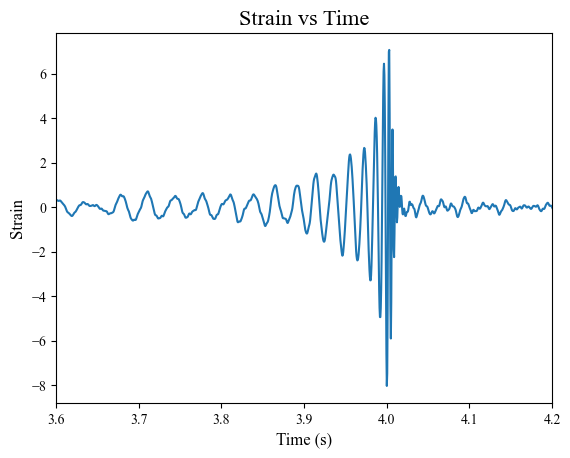

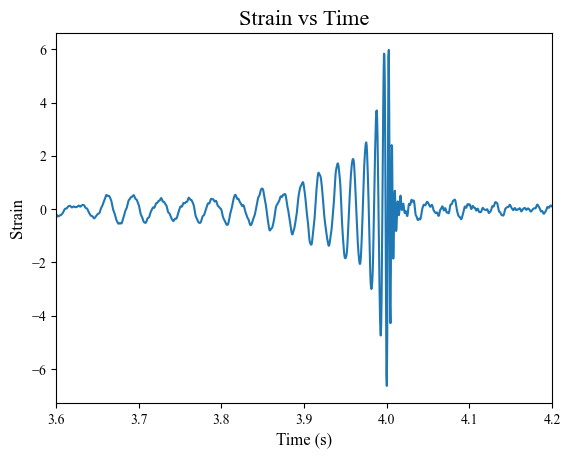

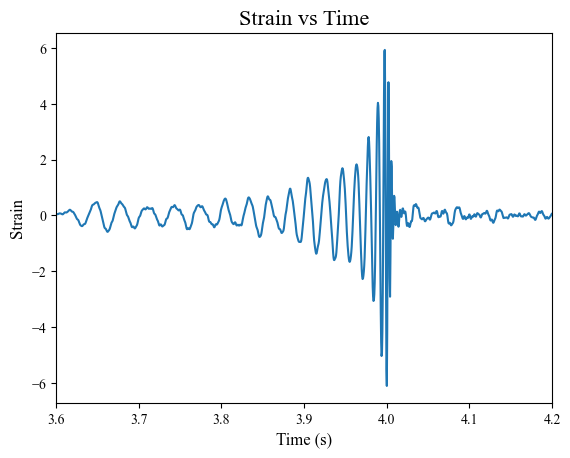

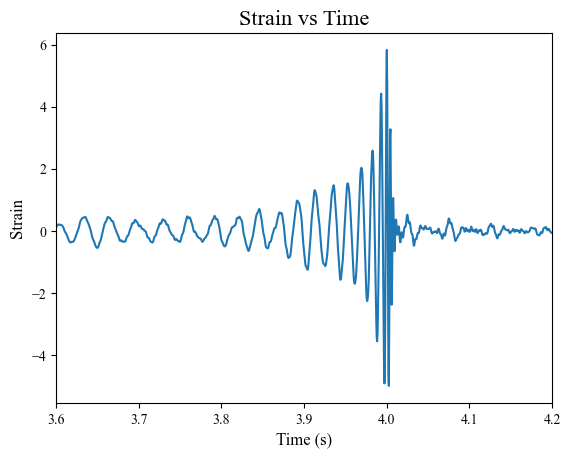

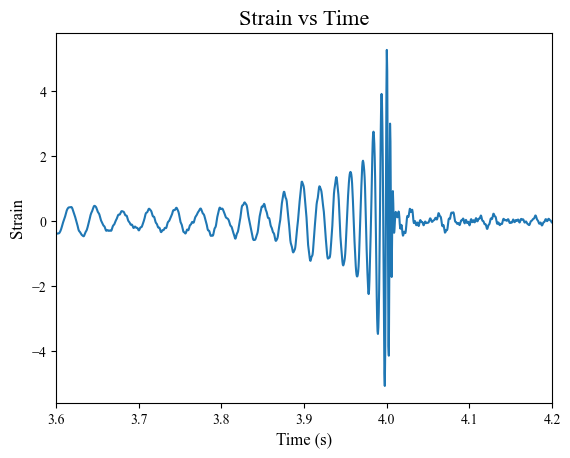

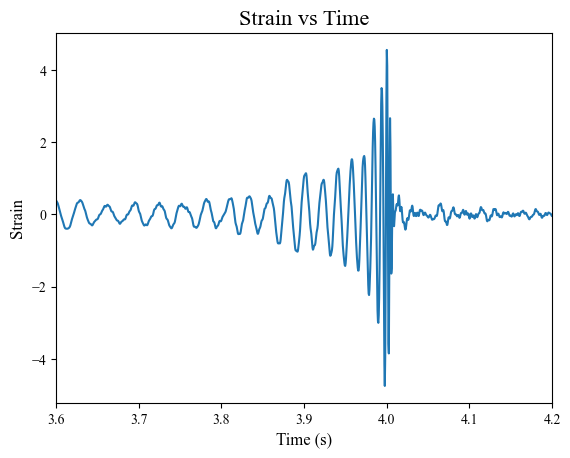

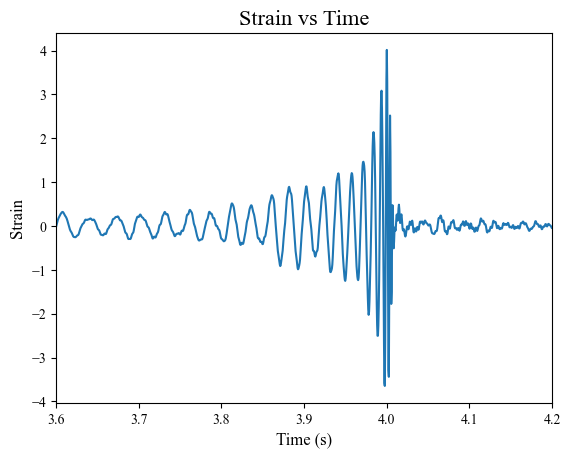

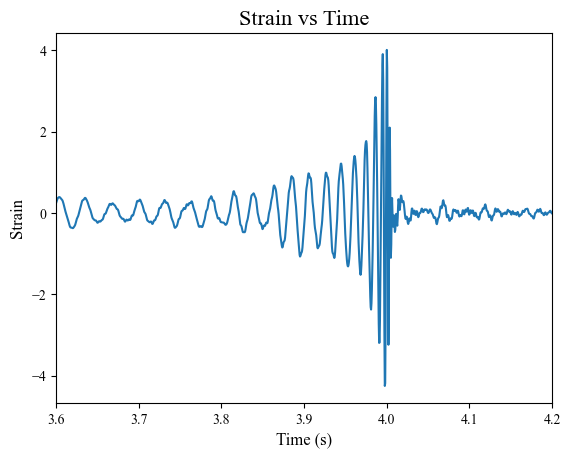

In [167]:
mass_one = [37,38,36,35,34,33,32,31,25]
mass_two = [24,23,22,21,20,19,18,17,24]
mass_three = np.array(mass_one) - 1
distance = [400,500,350,450,430,510,390,200,420]
distance = np.sort(np.array(distance))
for i in range(len(mass_one)):
        t, template = gw.make_template(mass_one[i],mass_two[i],2048,8,inv_psd,distance[i])
        plt.figure()
        plt.plot(t, template)
        plt.xlabel('Time (s)', fontsize=axis_size)
        plt.xlim(3.6,4.2)
        plt.ylabel('Strain', fontsize=axis_size)
        plt.title('Strain vs Time', fontsize=title_size)
        plt.show()



# Task 2

As distance increases the amplitude of the wave decreases.
not much changes for masses that are simlar or different

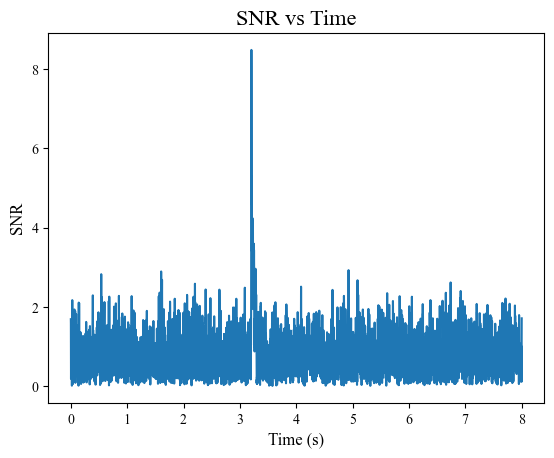

8.482283713317145
(array([6561]),)
[8.48228371] [3.20361328]


In [168]:
snr_ts = gw.get_snr(strain, template, 2048)
plt.figure()
plt.plot(time,snr_ts)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('SNR', fontsize=axis_size)
plt.title('SNR vs Time', fontsize=title_size)

plt.show()
print(np.max(snr_ts))
print(np.where(np.max(snr_ts) == snr_ts))
print(snr_ts[np.where(np.max(snr_ts) == snr_ts)],time[np.where(np.max(snr_ts) == snr_ts)])

min_time = time[np.where(np.max(snr_ts) == snr_ts)]-0.05
max_time = time[np.where(np.max(snr_ts) == snr_ts)]+0.05


### Part a

13.817943693057638 38.94736842105264 34.8421052631579


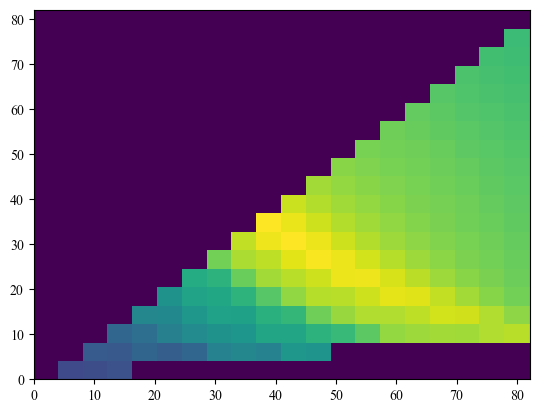

13.826971256612358 37.10526315789474 35.26315789473684


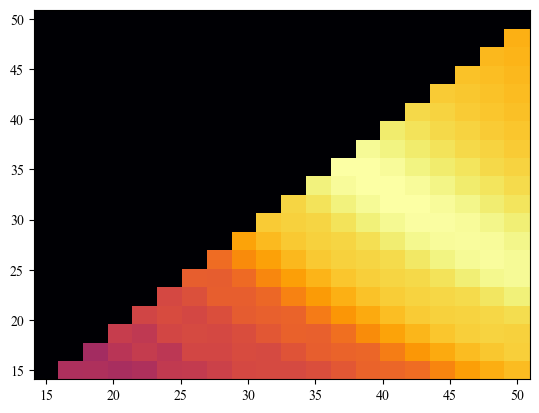

In [169]:
masses = np.linspace(2,80,20)
currentmax = 0
highest_snr = [[0 for x in range(13)] for y in range(13)]
mass1 = [] 
mass2 = [] 
allsnr = []

for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            maxsnr = np.max(snr_ts)
            allsnr.append(maxsnr)
            if maxsnr > currentmax:
                currentmax = maxsnr
                M1 = m1
                M2 = m2
        else:
            allsnr.append(0)
print(currentmax, M1, M2)

reshaped = (np.reshape(allsnr, (20,20)).T)
plt.figure()
plt.pcolor(masses, masses, reshaped)
plt.show()

allsnr2 = []
currentmax = 0
masses2 = np.linspace(15,50,20)
maxsnr = []
for m1 in masses2:
    for m2 in masses2:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd)
            snr_ts = gw.get_snr(strain, template, 2048)
            maxsnr = np.max(snr_ts)
            allsnr2.append(maxsnr)
            if maxsnr > currentmax:
                currentmax = maxsnr
                M1 = m1
                M2 = m2
        else:
            allsnr2.append(0)
print(currentmax, M1, M2)



reshaped = (np.reshape(allsnr2, (20,20)).T)
plt.figure()
plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
plt.show()

Best fit mass pair for snr result is 36,35 solar masses

### Part b

(3.0, 3.3)

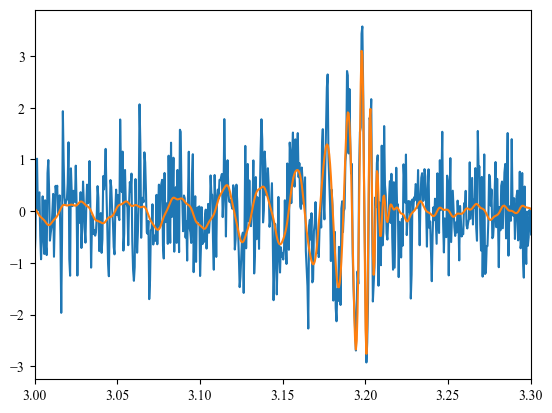

In [170]:
data = np.loadtxt('strain_data/GW150914_strain.txt')
time = data[:,0]
strain = data[:,1]
inv_psd = np.loadtxt('inv_psd/GW150914_inv_psd.txt',usecols=(1,))
t, template = gw.make_template(36.8,35.5,2048,8,inv_psd,d=1144,tc=3.1978,phic=0)
plt.plot(time, strain)
plt.plot(t, template)
plt.xlim(3,3.3)

[[3.19824219]]


/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_91564/1711584164.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5])
/var/folders/tn/fqh6631n3p56r504tcsqvss00000gn/T/ipykernel_91564/1711584164.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  popt, pcov = curve_fit(make_signal,time ,strain, p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5]),bounds = b, sigma=ht_err, absolute_sigma=True)


The best fit parameters for distance, time, and phase are 1151.1513129536315, 3.1977281585687707, and 5.69828940481586e-16 respectively.


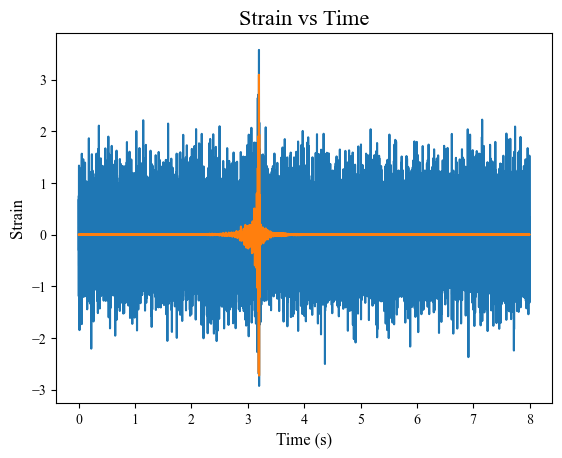

In [171]:
mass1 = M1
mass2 = M2
m1 = M1
m2 = M2

#generating the template using these masses
t, template = gw.make_template(m1,m2,2048,8,inv_psd)

#generating the snr timeseries
snr_ts = gw.get_snr(strain,template,2048)

def make_signal(t,d,tc,phic):
    _,signal = gw.make_template(mass1,mass2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
    return signal
t = 8
# distances = np.array(np.linspace(100,10000,10000))
tc_min = min_time
tc_max = max_time
print(time[(np.where(np.max(snr_ts) == snr_ts),)])
phic_min = 0
phic_max = 2*np.pi
d_min = 0
d_max = 10000
#p0 = [890,(time[np.where(np.max(snr_ts) == snr_ts)]),5]
p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5])

ht_err = np.array(np.ones(strain.size))
b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
popt, pcov = curve_fit(make_signal,time ,strain, p0 = np.array([1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5]),bounds = b, sigma=ht_err, absolute_sigma=True)

t, template = gw.make_template(m1,m2,2048,8,inv_psd,d = popt[0],tc = popt[1],phic = popt[2])

print(f'The best fit parameters for distance, time, and phase are {popt[0]}, {popt[1]}, and {popt[2]} respectively.')
plt.figure()
plt.plot(time, strain)
plt.plot(t, template)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Strain', fontsize=axis_size)
plt.title('Strain vs Time', fontsize=title_size)
plt.show()

# m1 = M1
# m2 = M2

# #generating the template using these masses
# t, template = gw.make_template(m1,m2,2048,8,inv_psd)

# #generating the snr timeseries
# snr_ts = gw.get_snr(strain,template,2048)

# # without above get wrong answer

# d_est = 1000 # Mpc
# tc_est = time[np.argmax(np.absolute(snr_ts))] # tc estimate at peak of snr timeseries
# phic_est = 0.5 # radians

# p0 = [d_est, tc_est, phic_est]

# # bounds on the fitting parameters
# d_min, d_max = [0, 10000]
# tc_min, tc_max = [tc_est-0.05, tc_est+0.05]
# phic_min, phic_max = [0,2*np.pi]

# ht_err = np.ones(strain.size)
# b = [[d_min,tc_min,phic_min,],[d_max,tc_max,phic_max]]
# popt, pcov = curve_fit(make_signal,time,strain,p0,bounds=b,sigma=ht_err,absolute_sigma=True)

# dist, timeco, phico = popt # fitted distance, time of coalescence and phase of coalescence parametes

# d_err, tc_err, phic_err = np.sqrt(np.diag(pcov)) # errors on these values

# print(f'Distance: {dist:0.2f} \u00B1 {d_err:0.2f}Mpc')
# print(f'Time of Coalescence:: {timeco:0.4f} \u00B1 {tc_err:0.4f}s')
# print(f'Phase at Coalescence:: {phico:0.1f} \u00B1 {phic_err:0.1f}1')

('GW150914', 'GW170823', 'GW170814', 'GW170104', 'GW151226', 'GW151012', 'GW170729', 'GW170809', 'GW170818')
------------------------------------------------------------
GW150914_strain.txt
GW150914_strain.txt


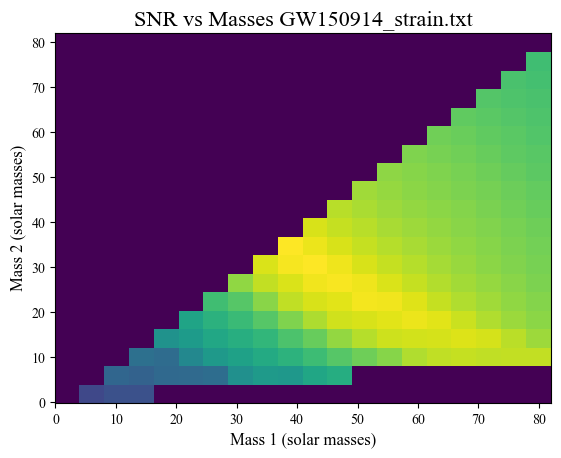

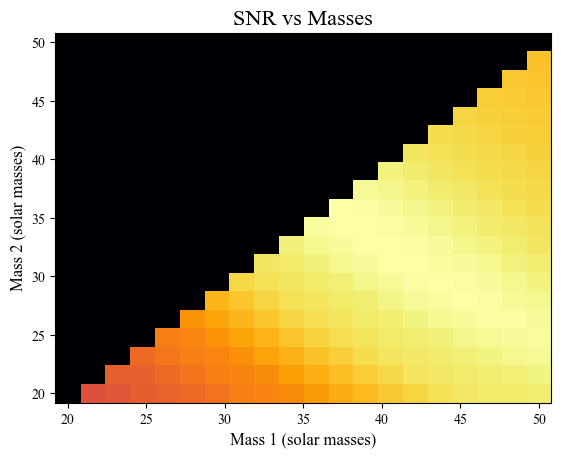

The best fit masses for GW150914_strain.txt are 37.368421052631575 and 34.21052631578947 respectively.
[[3.19775391]]
[[100 array([3.14775391]) 0]
 [4500 array([3.24775391]) 6.283185307179586]]
[1000, 3.19775390625, 0.5]


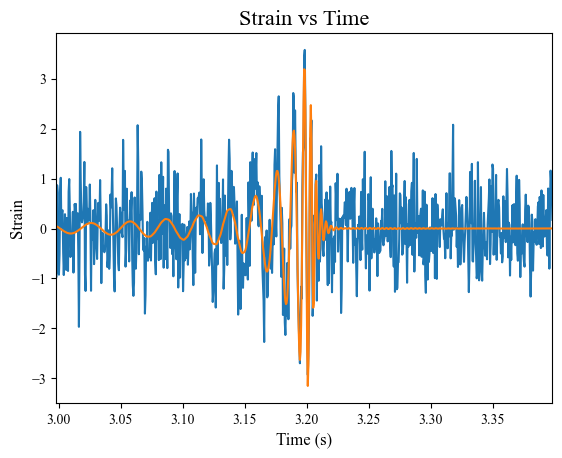

The best fit parameters for data set GW150914_strain.txt for distance, time, and phase are 1124.3824233791725, 3.197816642462039, and 0.2617431770562748 respectively.
------------------------------------------------------------
GW151012_strain.txt
GW151012_strain.txt


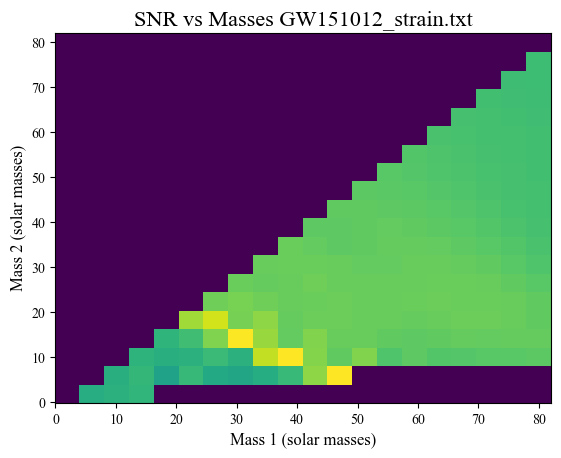

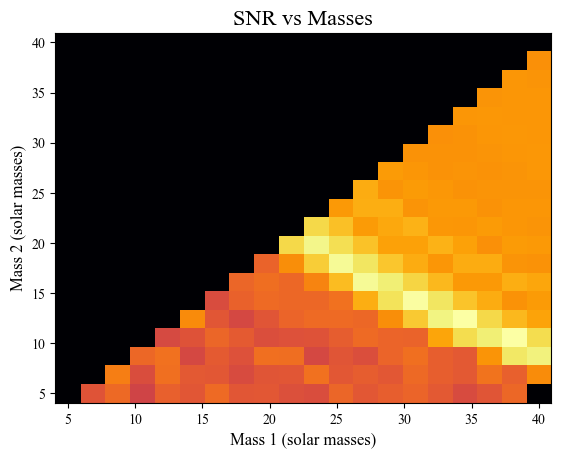

The best fit masses for GW151012_strain.txt are 38.1578947368421 and 10.526315789473685 respectively.
[[2.70849609]]
[[100 array([2.65849609]) 0]
 [4500 array([2.75849609]) 6.283185307179586]]
[1000, 2.70849609375, 0.5]


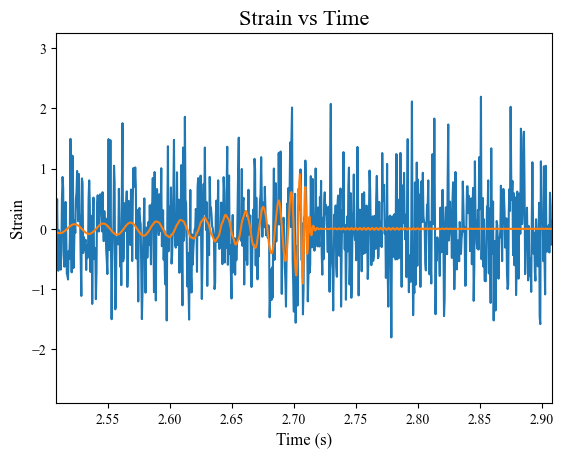

The best fit parameters for data set GW151012_strain.txt for distance, time, and phase are 1767.0551150270978, 2.7075734064272075, and 9.436371587957731e-13 respectively.
------------------------------------------------------------
GW151226_strain.txt
GW151226_strain.txt


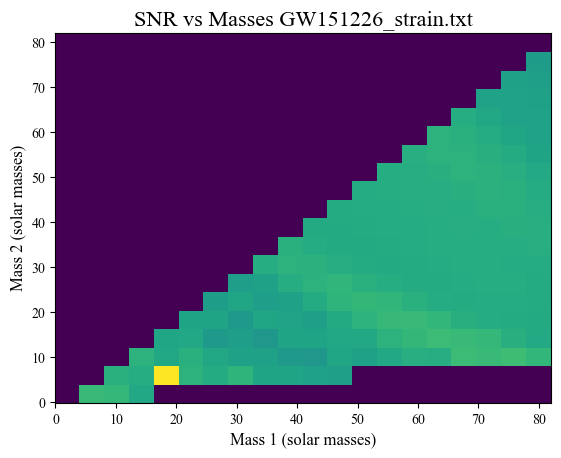

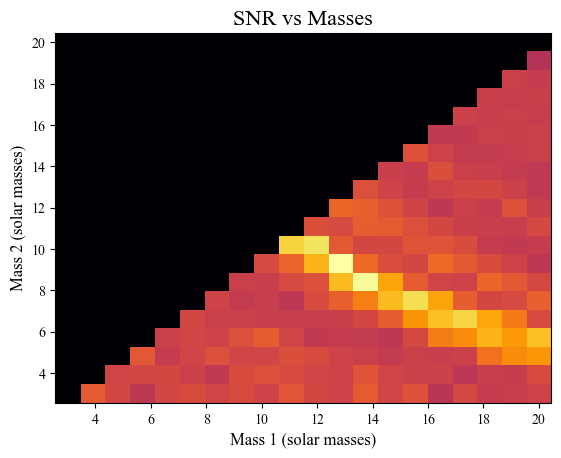

The best fit masses for GW151226_strain.txt are 12.842105263157894 and 9.263157894736842 respectively.
[[2.06835938]]
[[100 array([2.01835938]) 0]
 [4500 array([2.11835937]) 6.283185307179586]]
[1000, 2.068359375, 0.5]


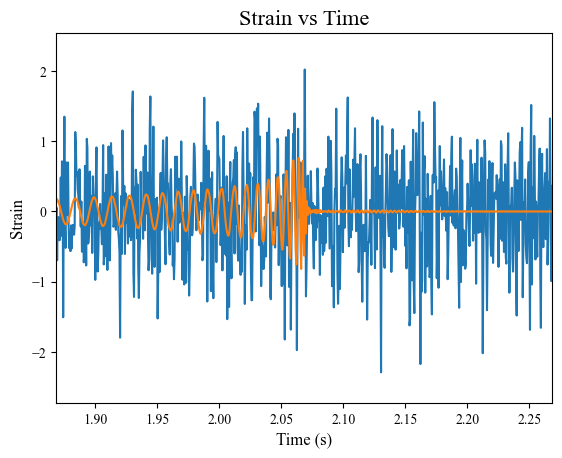

The best fit parameters for data set GW151226_strain.txt for distance, time, and phase are 1014.3932942423535, 2.0684365133504343, and 2.8082864064896635 respectively.
------------------------------------------------------------
GW170104_strain.txt
GW170104_strain.txt


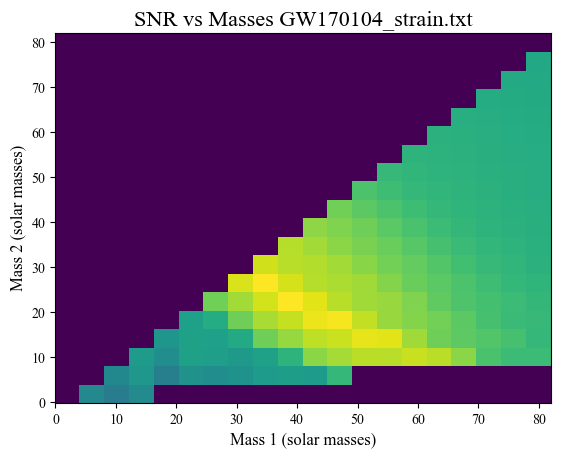

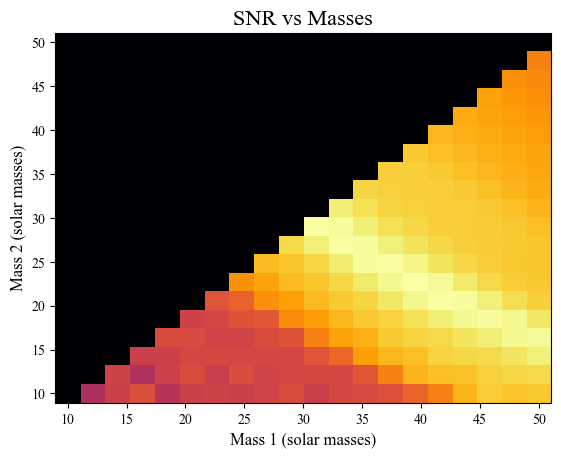

The best fit masses for GW170104_strain.txt are 39.473684210526315 and 22.63157894736842 respectively.
[[1.97412109]]
[[100 array([1.92412109]) 0]
 [4500 array([2.02412109]) 6.283185307179586]]
[1000, 1.97412109375, 0.5]


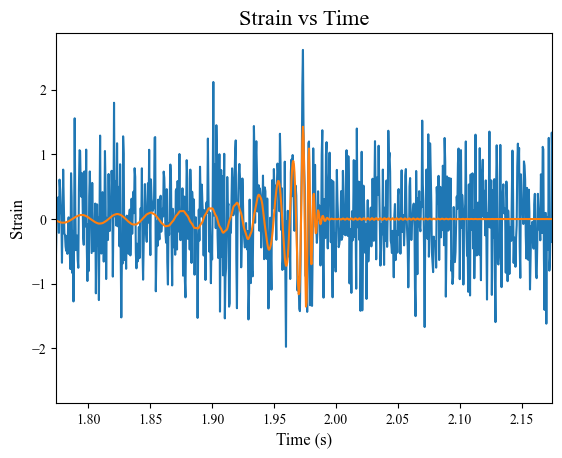

The best fit parameters for data set GW170104_strain.txt for distance, time, and phase are 2061.59878773546, 1.9742312060003369, and 2.109421121470109 respectively.
------------------------------------------------------------
GW170608_strain.txt
GW170608_strain.txt


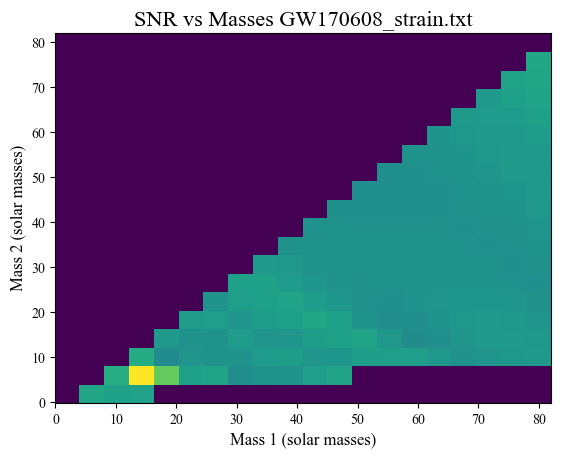

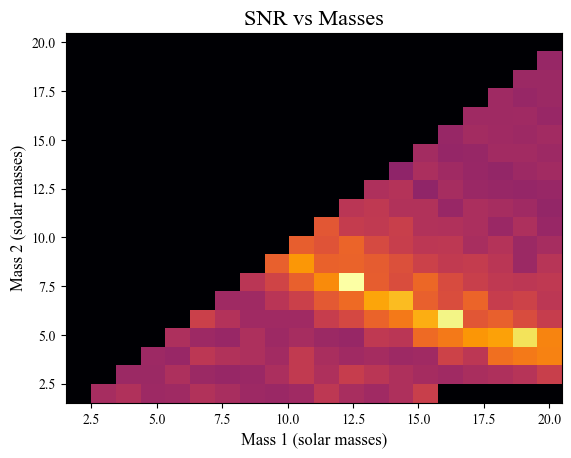

The best fit masses for GW170608_strain.txt are 12.421052631578949 and 7.684210526315789 respectively.
[[3.79150391]]
[[100 array([3.74150391]) 0]
 [4500 array([3.84150391]) 6.283185307179586]]
[1000, 3.79150390625, 0.5]


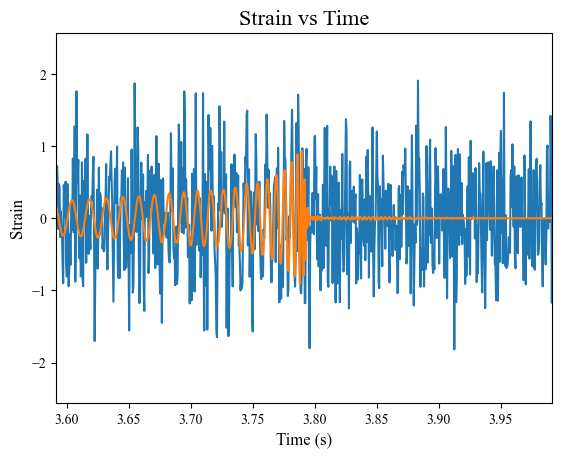

The best fit parameters for data set GW170608_strain.txt for distance, time, and phase are 734.4884724016681, 3.791376170849853, and 1.8007117238737793 respectively.
------------------------------------------------------------
GW170729_strain.txt
GW170729_strain.txt


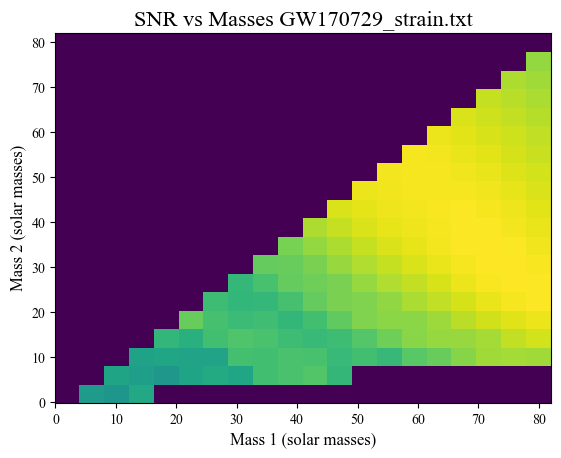

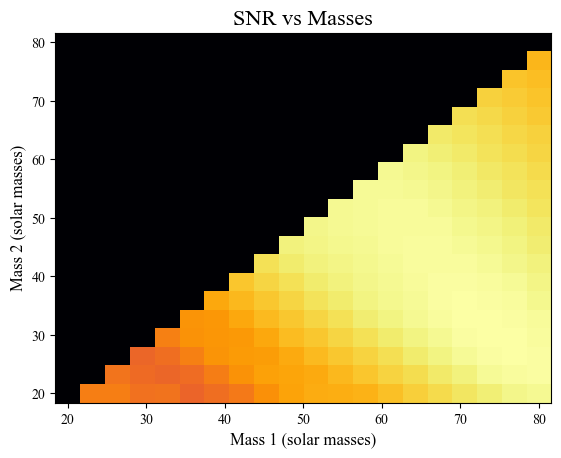

The best fit masses for GW170729_strain.txt are 73.6842105263158 and 32.63157894736842 respectively.
[[3.54101562]]
[[100 array([3.49101563]) 0]
 [4500 array([3.59101562]) 6.283185307179586]]
[1000, 3.541015625, 0.5]


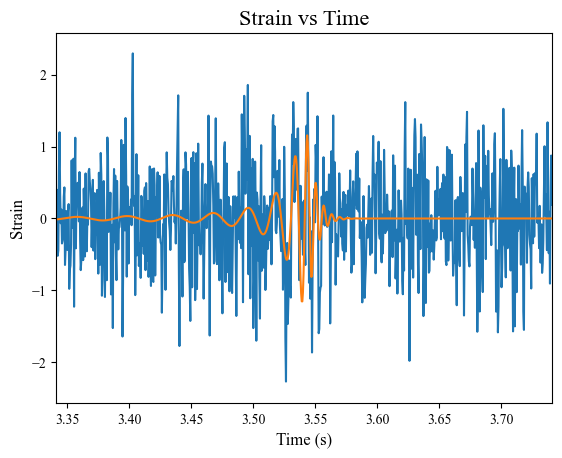

The best fit parameters for data set GW170729_strain.txt for distance, time, and phase are 3359.433633045078, 3.54093134571141, and 2.148997256246093 respectively.
------------------------------------------------------------
GW170809_strain.txt
GW170809_strain.txt


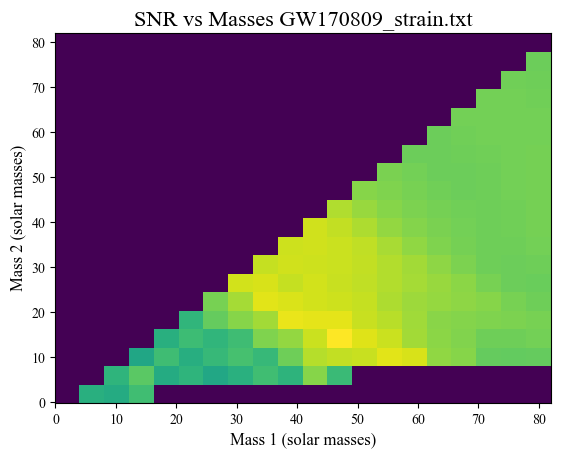

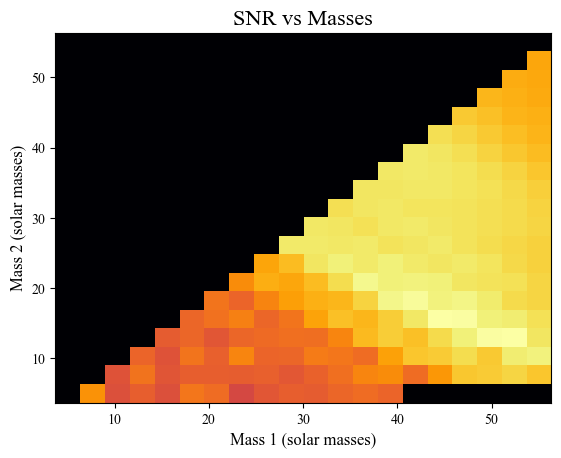

The best fit masses for GW170809_strain.txt are 44.473684210526315 and 15.526315789473685 respectively.
[[2.64257812]]
[[100 array([2.59257813]) 0]
 [4500 array([2.69257812]) 6.283185307179586]]
[1000, 2.642578125, 0.5]


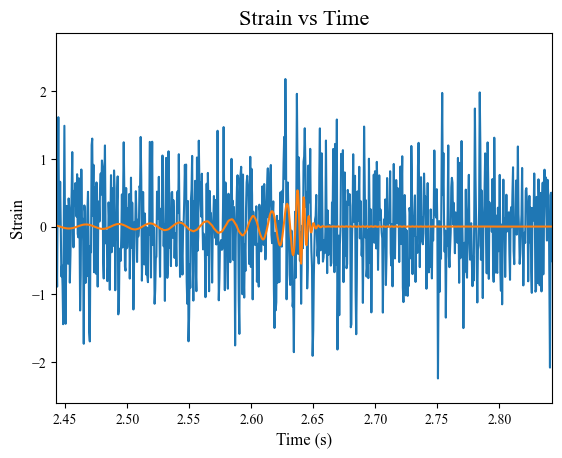

The best fit parameters for data set GW170809_strain.txt for distance, time, and phase are 4187.511047910968, 2.640186940451129, and 8.393474778296687e-10 respectively.
------------------------------------------------------------
GW170814_strain.txt
GW170814_strain.txt


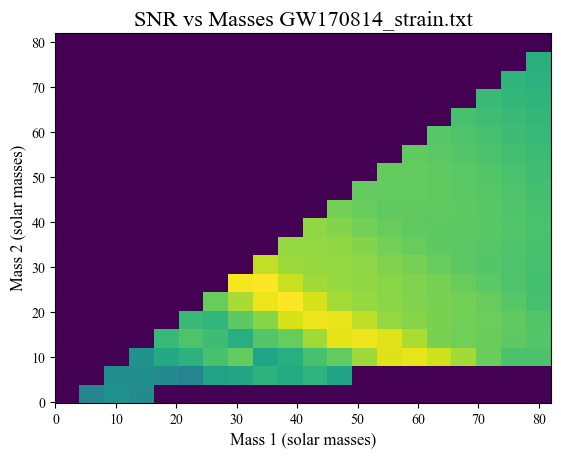

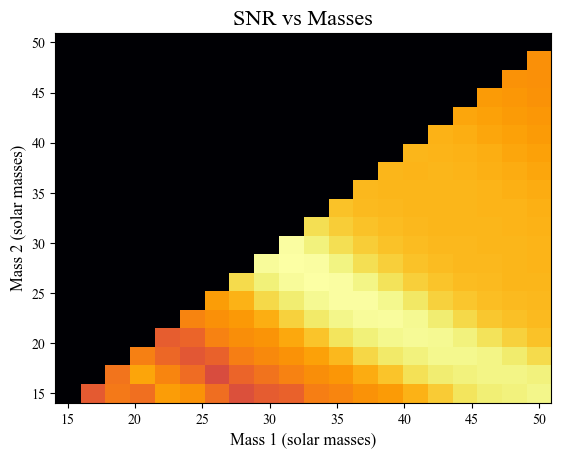

The best fit masses for GW170814_strain.txt are 31.578947368421055 and 27.894736842105264 respectively.
[[3.33691406]]
[[100 array([3.28691406]) 0]
 [4500 array([3.38691406]) 6.283185307179586]]
[1000, 3.3369140625, 0.5]


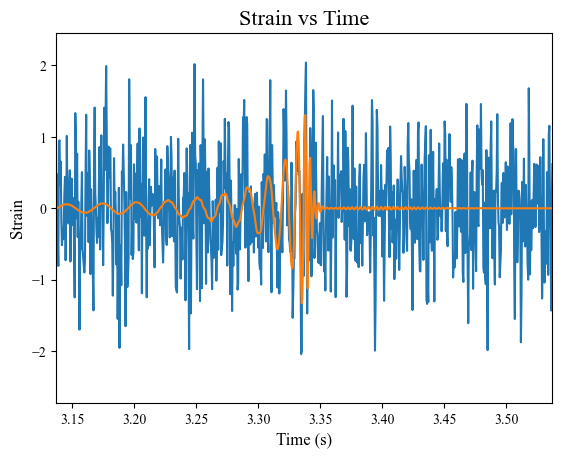

The best fit parameters for data set GW170814_strain.txt for distance, time, and phase are 2227.3193245941343, 3.3370779093130265, and 0.5982025311515204 respectively.
------------------------------------------------------------
GW170817_strain.txt
------------------------------------------------------------
GW170818_strain.txt
GW170818_strain.txt


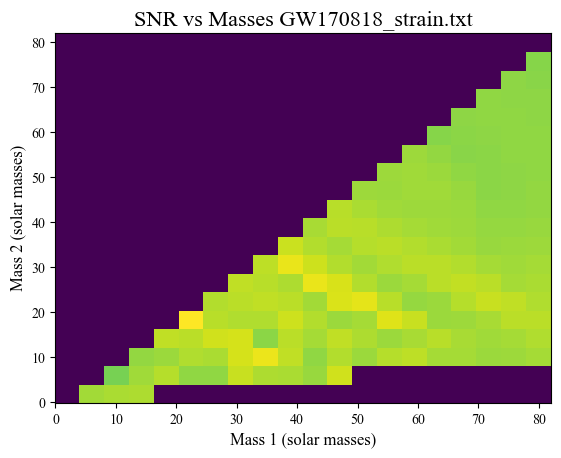

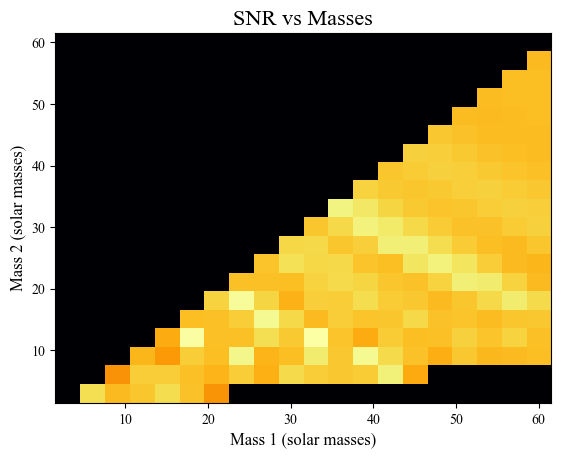

The best fit masses for GW170818_strain.txt are 33.0 and 12.0 respectively.
[[7.93798828]]
[[100 array([7.88798828]) 0]
 [4500 array([7.98798828]) 6.283185307179586]]
[1000, 7.93798828125, 0.5]


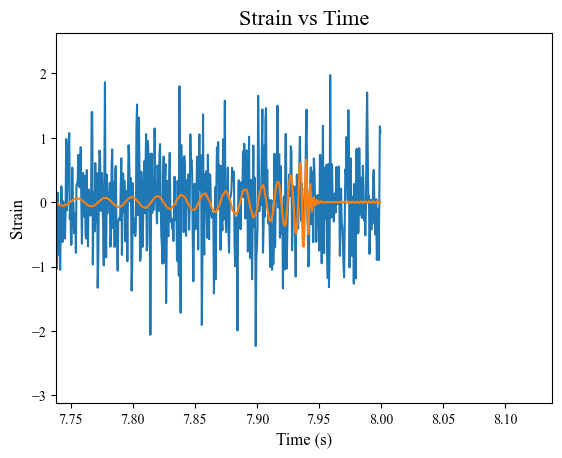

The best fit parameters for data set GW170818_strain.txt for distance, time, and phase are 2503.6724232299784, 7.938075936530649, and 2.667396302111291 respectively.
------------------------------------------------------------
GW170823_strain.txt
GW170823_strain.txt


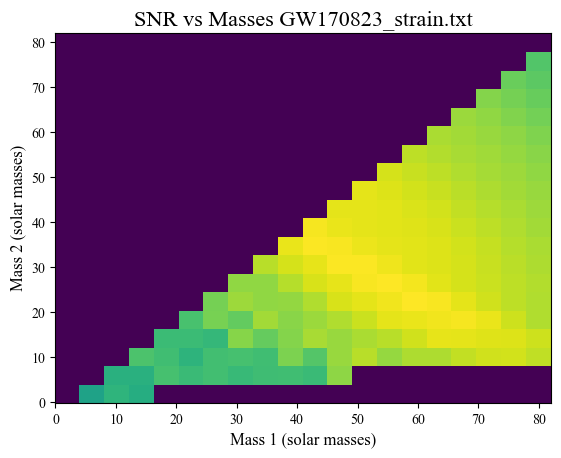

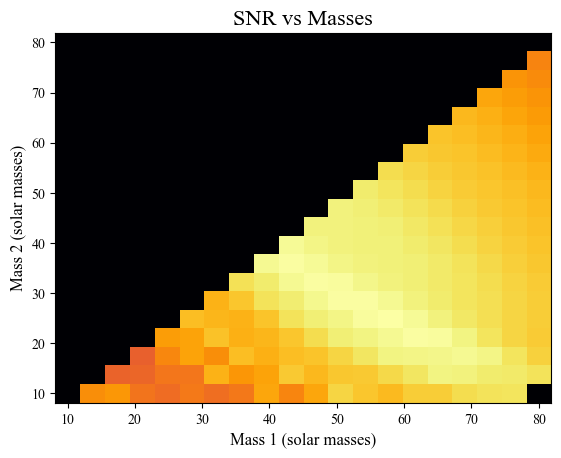

The best fit masses for GW170823_strain.txt are 57.89473684210526 and 24.736842105263158 respectively.
[[4.45800781]]
[[100 array([4.40800781]) 0]
 [4500 array([4.50800781]) 6.283185307179586]]
[1000, 4.4580078125, 0.5]


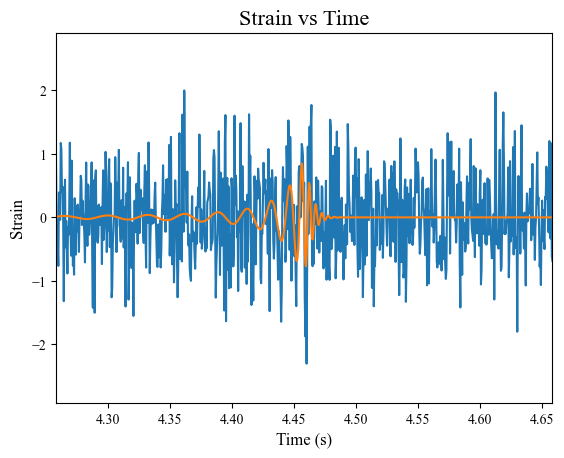

The best fit parameters for data set GW170823_strain.txt for distance, time, and phase are 3970.5001701613296, 4.456135285530775, and 1.3792862428148128e-10 respectively.


In [187]:
path = 'strain_data/'
files = np.sort(os.listdir(path))

distance_coel = [] 
time_coel = []
phase_coel = [] 
larger_masses = []
smaller_masses = []
names = []
name = ('GW150914', 'GW170823', 'GW170814', 'GW170104', 'GW151226', 'GW151012', 
'GW170729', 'GW170809', 'GW170818')

i = 0
j = 0

for file in files:
    filename = path+file
    print('------------------------------------------------------------')
    print(file)
    if file.startswith('GW170817'):
        pass
    else:
        names.append(file)
        if file.endswith('strain.txt'):
            data = np.loadtxt(filename)
            time = data[:,0]
            strain = data[:,1]
        print(file)  
        for data in os.listdir('inv_psd/'):
            if data.endswith('inv_psd.txt'):
                inv_psd_data = np.loadtxt('inv_psd/'+ data)
                inv_psd2 = inv_psd_data[:,1]

        t, template = gw.make_template(37,36,2048,8,inv_psd2,400)
        snr_ts = gw.get_snr(strain, template, 2048)
        min_time = time[np.where(np.max(snr_ts) == snr_ts)]-0.05
        max_time = time[np.where(np.max(snr_ts) == snr_ts)]+0.05

        masses = np.linspace(2,80,20)
        currentmax = 0
        highest_snr = [[0 for x in range(13)] for y in range(13)]
        mass1 = [] 
        mass2 = [] 
        allsnr = []

        for m1 in masses:
            for m2 in masses:
                if m1>m2 and (m1/m2) < 8:
                    t, template = gw.make_template(m1,m2,2048,8,inv_psd2)
                    snr_ts = gw.get_snr(strain, template, 2048)
                    maxsnr = np.max(snr_ts)
                    allsnr.append(maxsnr)
                    if maxsnr > currentmax:
                        currentmax = maxsnr
                        M1 = m1
                        M2 = m2

                else:
                    allsnr.append(0)
        reshaped = (np.reshape(allsnr, (20,20)).T)

        plt.figure()
        plt.title(f'SNR vs Masses {file}', fontsize=title_size)
        plt.xlabel('Mass 1 (solar masses)', fontsize=axis_size)
        plt.ylabel('Mass 2 (solar masses)', fontsize=axis_size)
        plt.pcolor(masses, masses, reshaped)
        plt.show()

        set_mass1 = [50, 40, 20, 50, 20, 80, 55, 50, 60, 80]
        set_mass2 = [20, 5, 3, 10, 2, 20, 5, 15, 3, 10]
        masses2 = []
        # for i in set_mass1:
        #     for j in set_mass2:
        masses2 = np.linspace(set_mass1[i],set_mass2[j],20)
                
        i = i + 1
        j = j + 1

        allsnr2 = []
        currentmax = 0
        # masses2 = np.linspace(15,50,20)
        maxsnr = []
        for m1 in masses2:
            for m2 in masses2:
                if m1>m2 and (m1/m2) < 8:
                    t, template = gw.make_template(m1,m2,2048,8,inv_psd2,400)
                    snr_ts = gw.get_snr(strain, template, 2048)
                    maxsnr = np.max(snr_ts)
                    allsnr2.append(maxsnr)
                    if maxsnr > currentmax:
                        currentmax = maxsnr
                        M1 = m1
                        M2 = m2
                else:
                    allsnr2.append(0)

        reshaped = (np.reshape(allsnr2, (20,20)).T)
        plt.figure()
        plt.title('SNR vs Masses', fontsize=title_size)
        plt.xlabel('Mass 1 (solar masses)', fontsize=axis_size)
        plt.ylabel('Mass 2 (solar masses)', fontsize=axis_size)
        plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
        plt.show()
        
        mass1 = M1
        mass2 = M2
        m1 = M1
        m2 = M2
        t, template = gw.make_template(m1,m2,2048,8,inv_psd2)

        snr_ts = gw.get_snr(strain, template, 2048)
        min_time = time[np.where(np.max(snr_ts) == snr_ts)]-0.05
        max_time = time[np.where(np.max(snr_ts) == snr_ts)]+0.05

        #generating the snr timeseries
        snr_ts = gw.get_snr(strain,template,2048)

        def make_signal(t,d,tc,phic):
            _,signal = gw.make_template(M1,M2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
            return signal
        t = 8
        distances = np.array(np.linspace(100,10000,10000))
        tc_min = min_time
        tc_max = max_time
        phic_min = 0
        phic_max = 2*np.pi
        d_min = 100
        d_max = 4500
        
        print(f'The best fit masses for {file} are {M1} and {M2} respectively.')
        print(time[(np.where(np.max(snr_ts) == snr_ts),)])
        ht_err = np.array(np.ones(strain.size))
        b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
        t_est = time[np.argmax(snr_ts)]
        p0 = [1000,t_est,0.5]

        print(b)
        print(p0)
        popt, pcov = curve_fit(make_signal,time ,strain, p0 = [1000,time[(np.where(np.max(snr_ts) == snr_ts),)],0.5],bounds = b, sigma=ht_err, absolute_sigma=True)

        distance_coel.append(popt[0])
        time_coel.append(popt[1])
        phase_coel.append(popt[2])
        larger_masses.append(M1)
        smaller_masses.append(M2)

        t, template = gw.make_template(m1,m2,2048,8,inv_psd2,d = popt[0],tc = popt[1],phic = popt[2])
        lims = [tc_min-0.15, tc_max+0.15]
        plt.figure()
        plt.plot(time, strain)
        plt.plot(t, template)
        plt.xlabel('Time (s)', fontsize=axis_size)
        plt.xlim(lims[0], lims[1])
        plt.ylabel('Strain', fontsize=axis_size)
        plt.title('Strain vs Time', fontsize=title_size)
        plt.show()
        print(f'The best fit parameters for data set {file} for distance, time, and phase are {popt[0]}, {popt[1]}, and {popt[2]} respectively.')
        # print(currentmax, M1, M2)


In [188]:
df = pd.DataFrame({'file':names,'Distance (Mpc)':distance_coel, 'Time (s)':time_coel, 'Phase (radians)':phase_coel, 'Larger Mass (solar masses)':larger_masses, 'Smaller Mass (solar masses)':smaller_masses})
df.to_csv('coel_data.csv')
df



,file,Distance (Mpc),Time (s),Phase (radians),Larger Mass (solar masses),Smaller Mass (solar masses)
0,GW150914_strain.txt,1124.382423,3.197817,2.617432e-01,37.368421,34.210526
1,GW151012_strain.txt,1767.055115,2.707573,9.436372e-13,38.157895,10.526316
2,GW151226_strain.txt,1014.393294,2.068437,2.808286e+00,12.842105,9.263158
3,GW170104_strain.txt,2061.598788,1.974231,2.109421e+00,39.473684,22.631579
4,GW170608_strain.txt,734.488472,3.791376,1.800712e+00,12.421053,7.684211
5,GW170729_strain.txt,3359.433633,3.540931,2.148997e+00,73.684211,32.631579
6,GW170809_strain.txt,4187.511048,2.640187,8.393475e-10,44.473684,15.526316
7,GW170814_strain.txt,2227.319325,3.337078,5.982025e-01,31.578947,27.894737
8,GW170818_strain.txt,2503.672423,7.938076,2.667396e+00,33.000000,12.000000
9,GW170823_strain.txt,3970.500170,4.456135,1.379286e-10,57.894737,24.736842


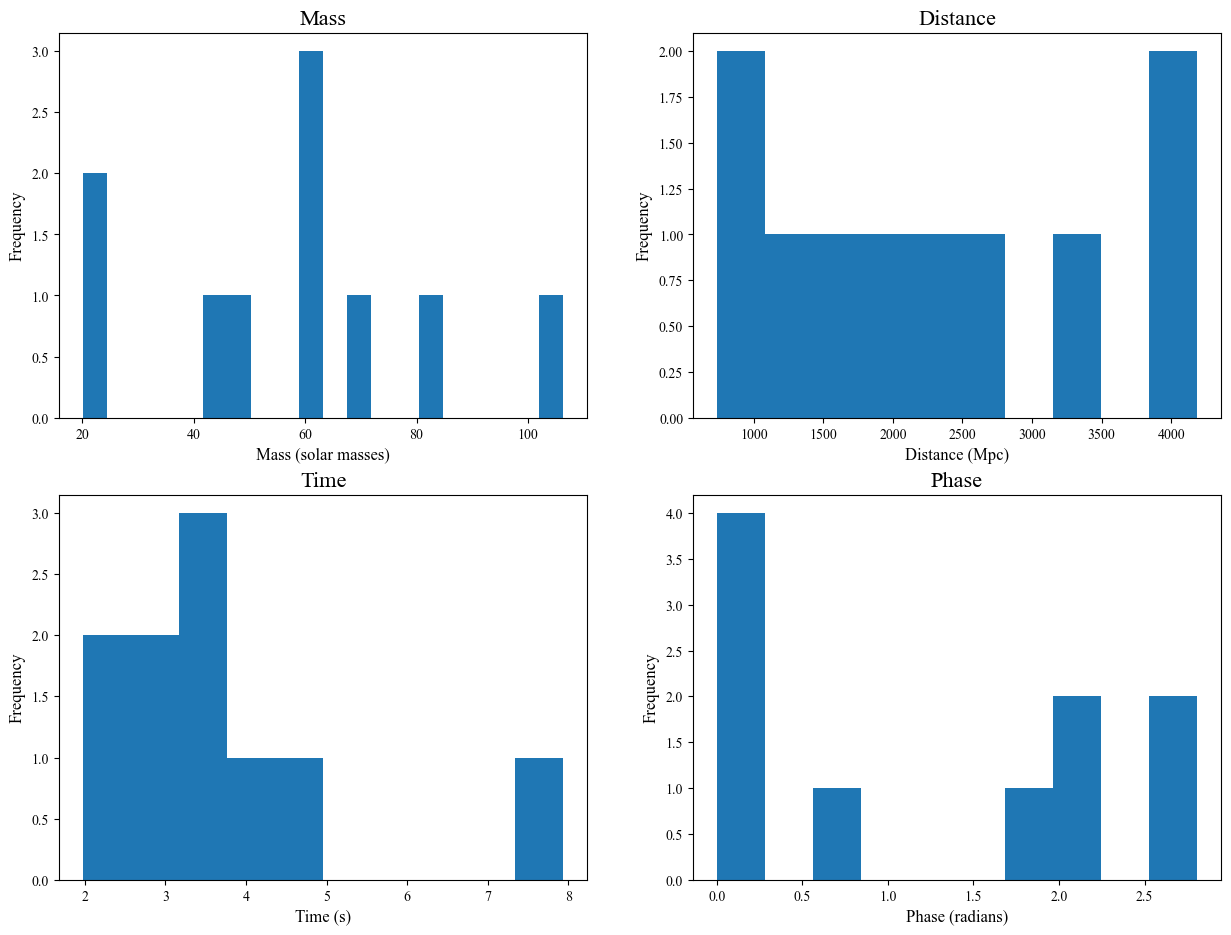

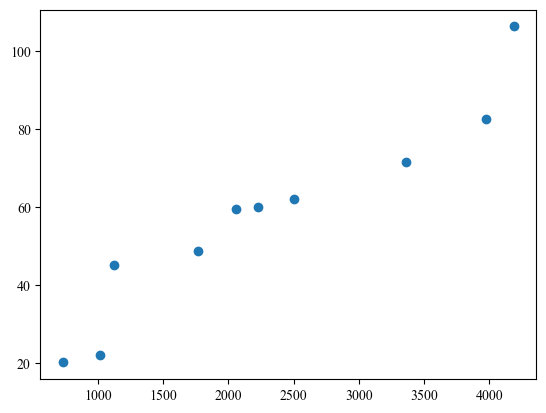

['GW150914_strain.txt', 'GW151012_strain.txt', 'GW151226_strain.txt', 'GW170104_strain.txt', 'GW170608_strain.txt', 'GW170729_strain.txt', 'GW170809_strain.txt', 'GW170814_strain.txt', 'GW170818_strain.txt', 'GW170823_strain.txt']


In [192]:
all_masses = np.array(larger_masses) + np.array(smaller_masses)
all_masses = np.sort(all_masses)

sorted_dist_coel = np.sort(distance_coel)
plt.figure(figsize = (15,11))
plt.subplot(2,2,1)
plt.hist(all_masses, bins=20)
plt.xlabel('Mass (solar masses)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Mass', fontsize=title_size)

plt.subplot(2,2,3)
plt.hist(time_coel, bins=10)
plt.xlabel('Time (s)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Time', fontsize=title_size)

plt.subplot(2,2,2)
plt.hist(distance_coel, bins=10)
plt.xlabel('Distance (Mpc)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Distance', fontsize=title_size)

plt.subplot(2,2,4)
plt.hist(phase_coel, bins=10)
plt.xlabel('Phase (radians)', fontsize=axis_size)
plt.ylabel('Frequency', fontsize=axis_size)
plt.title('Phase', fontsize=title_size)
plt.show()

plt.figure()
plt.scatter( all_masses)
plt.show()

print(names)

In [193]:
print(np.sort(all_masses))
print(np.sort(distance_coel))


[ 20.10526316  22.10526316  45.          48.68421053  59.47368421
  60.          62.10526316  71.57894737  82.63157895 106.31578947]
[ 734.4884724  1014.39329424 1124.38242338 1767.05511503 2061.59878774
 2227.31932459 2503.67242323 3359.43363305 3970.50017016 4187.51104791]


In [ ]:
      
    # data = np.loadtxt('data_files/GW150914_strain.txt')
    # time = data[:,0]
    # strain = data[:,1]


    # inv_psd = np.loadtxt('data_files/GW150914_inv_psd.txt',usecols=(1,))
    # t, template = gw.make_template(37,36,2048,8,inv_psd,400)



    # snr_ts = gw.get_snr(strain, template, 2048)
    # min_time = time[np.where(np.max(snr_ts) == snr_ts)]-1
    # max_time = time[np.where(np.max(snr_ts) == snr_ts)]+1



    # masses = np.linspace(2,80,50)
    # currentmax = 0
    # highest_snr = [[0 for x in range(13)] for y in range(13)]
    # mass1 = [] 
    # mass2 = [] 
    # allsnr = []

    # for m1 in masses:
    #     for m2 in masses:
    #         if m1>m2 and (m1/m2) < 8:
    #             t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
    #             snr_ts = gw.get_snr(strain, template, 2048)
    #             maxsnr = np.max(snr_ts)
    #             allsnr.append(maxsnr)
    #             if maxsnr > currentmax:
    #                 currentmax = maxsnr
    #                 M1 = m1
    #                 M2 = m2
    #         else:
    #             allsnr.append(0)
    # print(currentmax, M1, M2)

    # reshaped = (np.reshape(allsnr, (50,50)).T)
    # plt.figure()
    # plt.pcolor(masses, masses, reshaped)
    # plt.show()

    # allsnr2 = []
    # currentmax = 0
    # masses2 = np.linspace(15,50,50)
    # maxsnr = []
    # for m1 in masses2:
    #     for m2 in masses2:
    #         if m1>m2 and (m1/m2) < 8:
    #             t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
    #             snr_ts = gw.get_snr(strain, template, 2048)
    #             maxsnr = np.max(snr_ts)
    #             allsnr2.append(maxsnr)
    #             if maxsnr > currentmax:
    #                 currentmax = maxsnr
    #                 M1 = m1
    #                 M2 = m2
    #         else:
    #             allsnr2.append(0)
    # print(currentmax, M1, M2)



    # reshaped = (np.reshape(allsnr2, (50,50)).T)
    # plt.figure()
    # plt.pcolor(masses2, masses2, reshaped, cmap='inferno')
    # plt.show()


    # mass1 = M1
    # mass2 = M2
    # def make_signal(t,d,tc,phic):
    #     _,signal = gw.make_template(mass1,mass2,2048,8,inv_psd,d=d,tc=tc,phic=phic)
    #     return signal
    # t = 8
    # distances = np.array(np.linspace(100,10000,10000))
    # tc_min = min_time
    # tc_max = max_time
    # phic_min = 0
    # phic_max = 2*np.pi
    # d_min = 100
    # d_max = 2000
    # #p0 = [890,(time[np.where(np.max(snr_ts) == snr_ts)]),5]


    # ht_err = np.array(np.ones(strain.size))
    # b = np.array([[d_min,tc_min,phic_min],[d_max,tc_max,phic_max]], dtype = object)
    # popt, pcov = curve_fit(make_signal,time ,strain, p0 = [890,time[(np.where(np.max(snr_ts) == snr_ts),)],5],bounds = b, sigma=ht_err, absolute_sigma=True)

    # t, template = gw.make_template(mass1,mass2,2048,8,inv_psd,popt[0],popt[1],popt[2])

    # print(f'The best fit parameters for distance, time, and phase are {popt[0]}, {popt[1]}, and {popt[2]} respectively.')
    # plt.figure()
    # plt.plot(time, strain)
    # plt.plot(time, template)
    # plt.xlabel('Time (s)', fontsize=axis_size)
    # plt.ylabel('Strain', fontsize=axis_size)
    # plt.title('Strain vs Time', fontsize=title_size)
    # #plt.xlim(2.9,3.4)
    # plt.show()

# Task 2 part a brute force method


In [ ]:
masses = np.linspace(2,80,13)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    final_mass1
    print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])

masses = np.linspace(15,70,20)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    #print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    


masses = np.linspace(33,40,200)
highest_snr = []
mass1 = [] 
mass2 = [] 


for m1 in masses:
    for m2 in masses:
        if m1>m2 and (m1/m2) < 8:
            t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
            snr_ts = gw.get_snr(strain, template, 2048)
            highest_snr.append(np.max(snr_ts))
            mass1.append(m1)
            mass2.append(m2)

#print(len(highest_snr))
sorted_snr = np.sort(highest_snr)
n=20
rslt = sorted_snr[-n:]

# print(rslt)
for i in range(n):
    indexes = np.where(highest_snr == rslt[i])
    print(mass1[indexes[0][0]],mass2[indexes[0][0]])
    # print(mass1[indexes[0][0]],mass2[indexes[0][0]])


In [ ]:
# for m1 in mass1:
#     for m2 in mass2:
#           if m1>m2 and (m1/m2) < 8:
#             t, template = gw.make_template(m1,m2,2048,8,inv_psd,400)
#             snr_ts = gw.get_snr(strain, template, 2048)
#             highest_snr.append(np.max(snr_ts))
#             mass1_2.append(m1)
#             mass2_2.append(m2)
